In [1]:
# Section 1: Introduction
# In this project, we aim to predict NYC taxi fare amounts using supervised machine learning techniques.
# The goal is to build a model that provides price certainty for taxi passengers, addressing the lack of fare transparency in traditional taxis.

print("Predicting NYC Taxi Fares with Supervised Machine Learning")
print("Objective: Build models to predict fare amounts using trip-related features.")

Predicting NYC Taxi Fares with Supervised Machine Learning
Objective: Build models to predict fare amounts using trip-related features.


In [2]:
# Essential libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/Users/arpitgarg/Desktop/archive/taxi_tripdata.csv')
print("Data loaded successfully!")

# Display basic info
df.info()

Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non

/var/folders/lf/rv21rdmn1kz034mpyh0gfs0r0000gn/T/ipykernel_5671/3647562741.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/arpitgarg/Desktop/archive/taxi_tripdata.csv')


In [3]:
# Show the first few rows
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


In [4]:
# Display number of rows and columns
print(f"Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.")

Dataset contains 83,691 rows and 20 columns.


In [5]:
# Summary of numerical features
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,51173.000000,51173.000000,83691.000000,83691.000000,51173.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,0.0,83691.000000,83691.000000,51173.000000,51173.000000,51173.000000
mean,1.851113,1.159244,108.362572,133.270005,1.307858,194.354699,20.388305,1.156707,0.293562,1.058618,0.624529,NaN,0.297745,24.204836,1.421726,1.034393,0.642815
std,0.355981,0.773260,70.370170,77.216791,0.984362,4405.549221,15.583552,1.367897,0.247773,2.368771,1.990481,NaN,0.031219,17.262183,0.511146,0.182239,1.164219
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,-150.000000,-4.500000,-0.500000,-1.140000,0.000000,NaN,-0.300000,-150.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,56.000000,69.000000,1.000000,1.350000,9.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.300000,11.760000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,132.000000,1.000000,2.760000,16.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,19.800000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,205.000000,1.000000,6.200000,26.830000,2.750000,0.500000,1.660000,0.000000,NaN,0.300000,31.300000,2.000000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,32.000000,260517.930000,480.000000,8.250000,0.500000,87.710000,30.050000,NaN,0.300000,480.310000,5.000000,2.000000,2.750000


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 VendorID                 32518
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       32518
RatecodeID               32518
PULocationID                 0
DOLocationID                 0
passenger_count          32518
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                83691
improvement_surcharge        0
total_amount                 0
payment_type             32518
trip_type                32518
congestion_surcharge     32518
dtype: int64


In [7]:
# List all column names and types
df.dtypes

VendorID                 float64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

In [8]:
# Fill missing values with mode for categorical/numeric categorical columns
mode_cols = ['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type']
for col in mode_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"Filled missing values in '{col}' with mode: {mode_value}")

# Fill 'congestion_surcharge' with mean
if 'congestion_surcharge' in df.columns:
    mean_value = df['congestion_surcharge'].mean()
    df['congestion_surcharge'].fillna(mean_value, inplace=True)
    print(f"Filled missing values in 'congestion_surcharge' with mean: {mean_value:.2f}")

# Drop 'ehail_fee' column if it exists
if 'ehail_fee' in df.columns:
    df.drop(columns='ehail_fee', inplace=True)
    print("Dropped column: 'ehail_fee'")

Filled missing values in 'VendorID' with mode: 2.0
Filled missing values in 'store_and_fwd_flag' with mode: N
Filled missing values in 'RatecodeID' with mode: 1.0
Filled missing values in 'passenger_count' with mode: 1.0
Filled missing values in 'payment_type' with mode: 1.0
Filled missing values in 'trip_type' with mode: 1.0
Filled missing values in 'congestion_surcharge' with mean: 0.64
Dropped column: 'ehail_fee'


In [9]:
# Convert to datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

# Calculate time taken in minutes
df['time_taken'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Create day of the week (0 = Monday, 6 = Sunday) and pickup hour
df['day'] = df['lpep_pickup_datetime'].dt.dayofweek
df['hour'] = df['lpep_pickup_datetime'].dt.hour

In [10]:
df.head()
df.shape

(83691, 22)

In [11]:
from scipy.stats import zscore

# Calculate Z-scores for numeric columns
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)

# Filter out rows with any Z-score > 3 (outlier)
df = df[(np.abs(z_scores) < 3).all(axis=1)]

print(f"Rows after outlier removal: {len(df):,}")

Rows after outlier removal: 67,176


In [12]:
# Check final columns and summary
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 67176 entries, 1 to 83690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67176 non-null  float64       
 1   lpep_pickup_datetime   67176 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  67176 non-null  datetime64[ns]
 3   store_and_fwd_flag     67176 non-null  object        
 4   RatecodeID             67176 non-null  float64       
 5   PULocationID           67176 non-null  int64         
 6   DOLocationID           67176 non-null  int64         
 7   passenger_count        67176 non-null  float64       
 8   trip_distance          67176 non-null  float64       
 9   fare_amount            67176 non-null  float64       
 10  extra                  67176 non-null  float64       
 11  mta_tax                67176 non-null  float64       
 12  tip_amount             67176 non-null  float64       
 13  tolls_

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,time_taken,day,hour
count,67176.0,67176,67176,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000,67176.00000,...,67176.000000,67176.000000,6.717600e+04,67176.000000,67176.000000,67176.0,67176.000000,67176.000000,67176.000000,67176.000000
mean,2.0,2021-07-16 13:20:16.478519040,2021-07-16 13:39:35.094974464,1.000982,108.128379,132.716253,1.050703,6.345303,19.827470,1.16922,...,0.889533,0.528954,3.000000e-01,23.422073,1.236543,1.0,0.661464,19.310274,2.980871,13.196752
min,2.0,2008-12-31 23:12:53,2008-12-31 23:27:09,1.000000,3.000000,3.000000,1.000000,0.000000,-20.910000,-2.75000,...,0.000000,0.000000,3.000000e-01,-17.440000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,2.0,2021-07-08 23:51:37.500000,2021-07-09 00:04:50.750000128,1.000000,55.000000,69.000000,1.000000,1.430000,9.000000,0.00000,...,0.000000,0.000000,3.000000e-01,11.835000,1.000000,1.0,0.000000,8.900000,1.000000,10.000000
50%,2.0,2021-07-16 12:32:27.500000,2021-07-16 12:57:58.500000,1.000000,75.000000,131.000000,1.000000,2.830000,16.500000,0.50000,...,0.000000,0.000000,3.000000e-01,20.090000,1.000000,1.0,0.642815,15.000000,3.000000,13.000000
75%,2.0,2021-07-24 12:57:41.750000128,2021-07-24 13:16:26.249999872,1.000000,166.000000,203.000000,1.000000,6.080000,26.450000,2.75000,...,1.560000,0.000000,3.000000e-01,30.740000,1.000000,1.0,0.642815,25.500000,4.000000,17.000000
max,2.0,2021-08-01 00:06:03,2021-08-01 00:38:00,2.000000,265.000000,265.000000,3.000000,13087.620000,67.000000,4.50000,...,8.160000,6.550000,3.000000e-01,75.890000,2.000000,1.0,2.750000,247.200000,6.000000,23.000000
std,0.0,NaN,NaN,0.031330,70.472581,76.968482,0.241731,129.428233,13.411177,1.23327,...,1.605746,1.754925,3.796436e-13,14.532025,0.424962,0.0,0.885096,14.976054,1.848744,4.921128


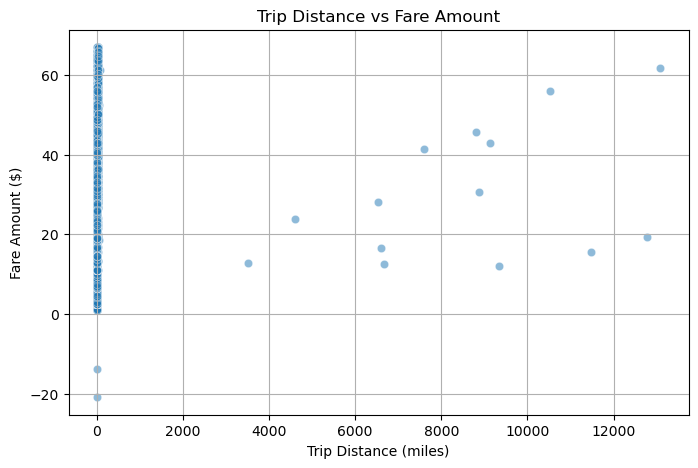

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', alpha=0.5)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

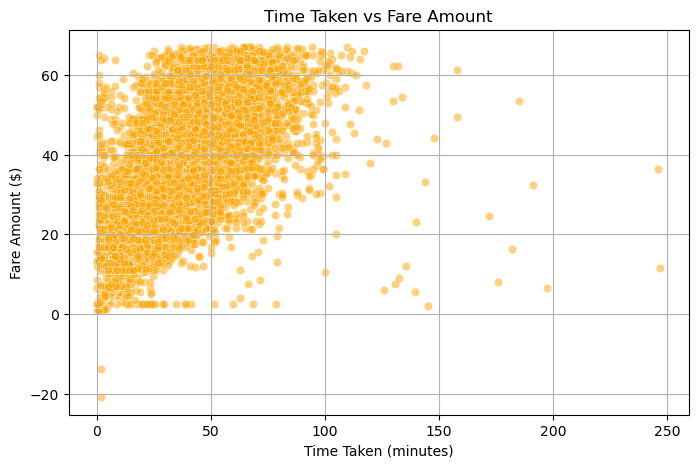

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='time_taken', y='fare_amount', alpha=0.5, color='orange')
plt.title('Time Taken vs Fare Amount')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

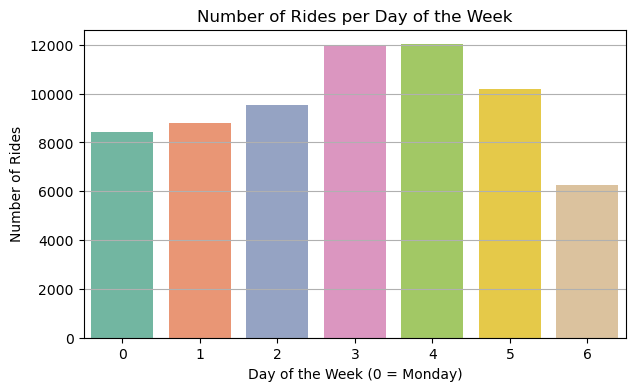

In [15]:
plt.figure(figsize=(7, 4))
sns.countplot(x='day', data=df, palette='Set2')
plt.title('Number of Rides per Day of the Week')
plt.xlabel('Day of the Week (0 = Monday)')
plt.ylabel('Number of Rides')
plt.grid(axis='y')
plt.show()

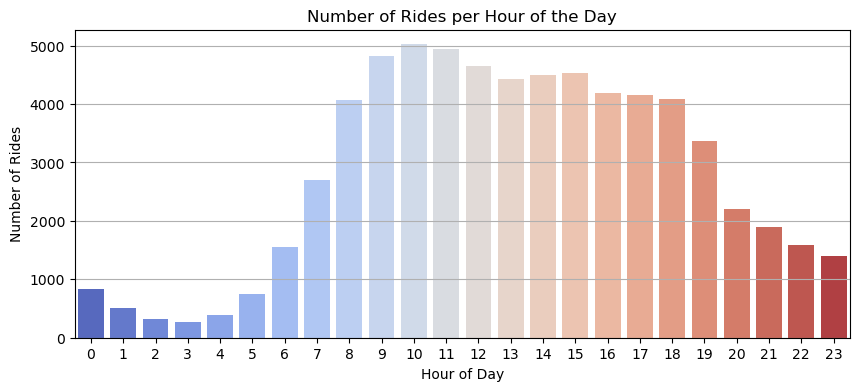

In [16]:
plt.figure(figsize=(10, 4))
sns.countplot(x='hour', data=df, palette='coolwarm')
plt.title('Number of Rides per Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.grid(axis='y')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define features and target
features = ['PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'day', 'hour', 'time_taken']
target = 'fare_amount'

X = df[features]
y = df[target]

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test)

In [19]:
# R², RMSE, MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

Linear Regression Performance:
R² Score: 0.691
RMSE: 7.479
MAE: 5.445


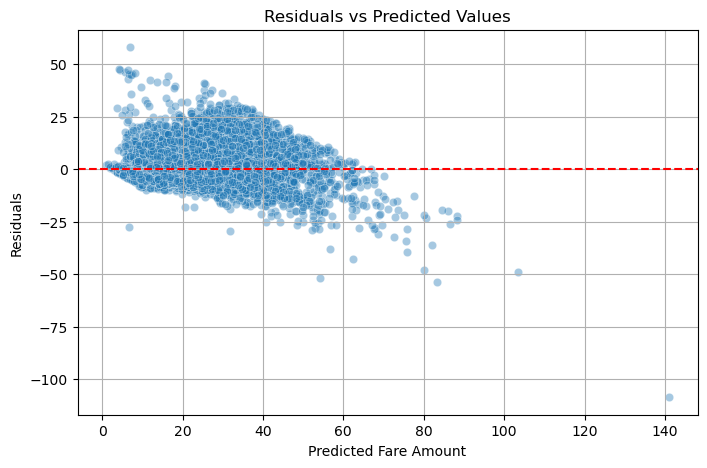

In [20]:
# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Fare Amount')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


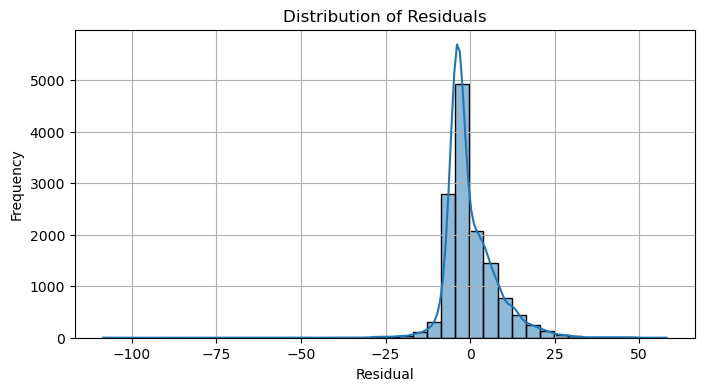

In [21]:
# Distribution of Residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=40, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Suppress warnings from CatBoost
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Store predictions and residuals
metrics = {}
residuals_dict = {}
predictions_dict = {}

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    res = y_test - preds

    # Save for plotting
    predictions_dict[name] = preds
    residuals_dict[name] = res

    # Metrics
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)

    metrics[name] = {'R²': r2, 'RMSE': rmse, 'MAE': mae}
    print(f"{name}:\n  R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}\n")

In [24]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
evaluate_model("Decision Tree", dt_model, X_train, X_test, y_train, y_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model("Random Forest", rf_model, X_train, X_test, y_train, y_test)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.3, random_state=42, verbosity=0)
evaluate_model("XGBoost", xgb_model, X_train, X_test, y_train, y_test)

# CatBoost
cat_model = CatBoostRegressor(n_estimators=1000, learning_rate=0.07, verbose=0, random_state=42)
evaluate_model("CatBoost", cat_model, X_train, X_test, y_train, y_test)

Decision Tree:
  R²: 0.768, RMSE: 6.479, MAE: 3.529

Random Forest:
  R²: 0.882, RMSE: 4.617, MAE: 2.623

XGBoost:
  R²: 0.886, RMSE: 4.549, MAE: 2.717

CatBoost:
  R²: 0.890, RMSE: 4.464, MAE: 2.586



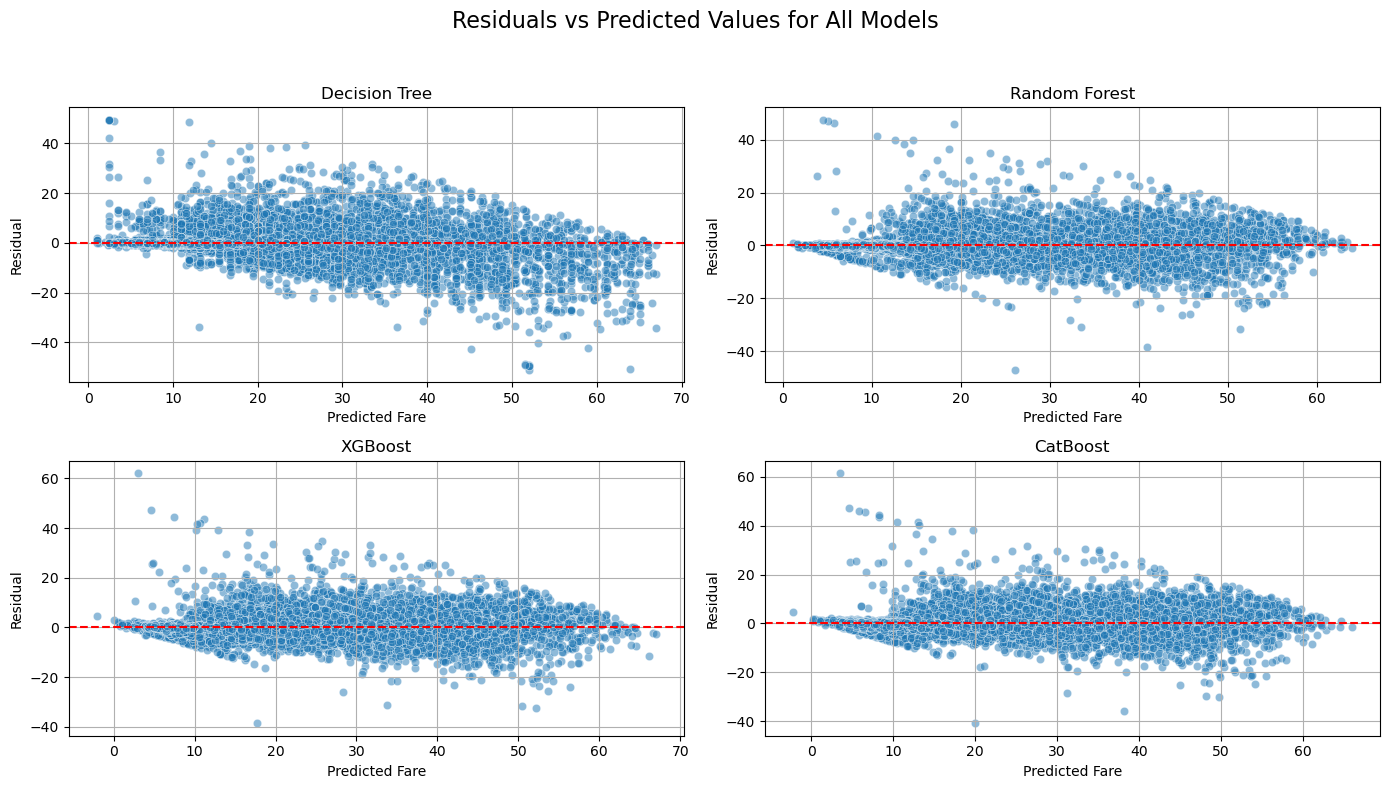

In [25]:
# Residuals vs Predicted subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Residuals vs Predicted Values for All Models', fontsize=16)

for ax, name in zip(axes.flat, predictions_dict.keys()):
    preds = predictions_dict[name]
    res = residuals_dict[name]
    sns.scatterplot(x=preds, y=res, ax=ax, alpha=0.5)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_title(name)
    ax.set_xlabel('Predicted Fare')
    ax.set_ylabel('Residual')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

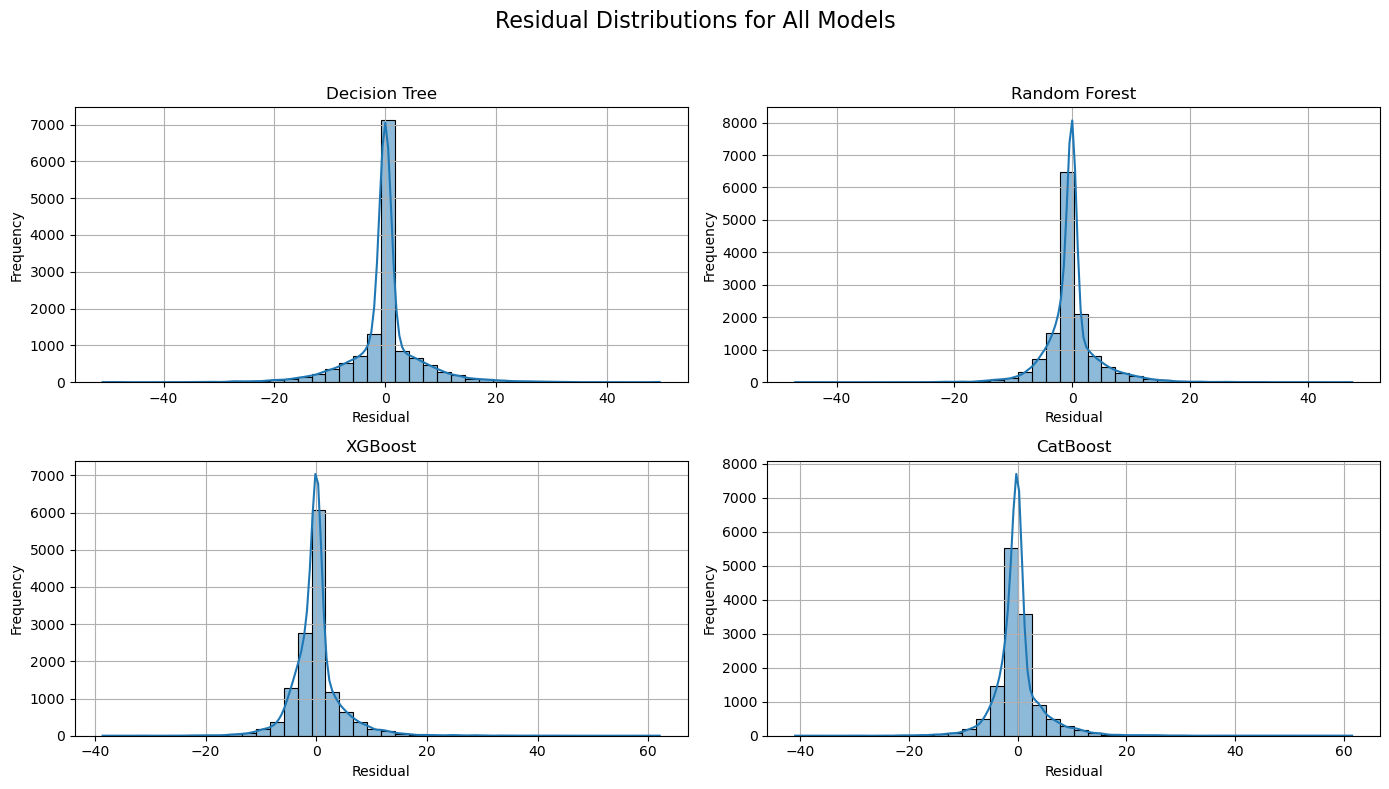

In [26]:
# Residual subplot for all models
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Residual Distributions for All Models', fontsize=16)

# Plot each residual histogram
for ax, (name, res) in zip(axes.flat, residuals_dict.items()):
    sns.histplot(res, bins=40, kde=True, ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Residual')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

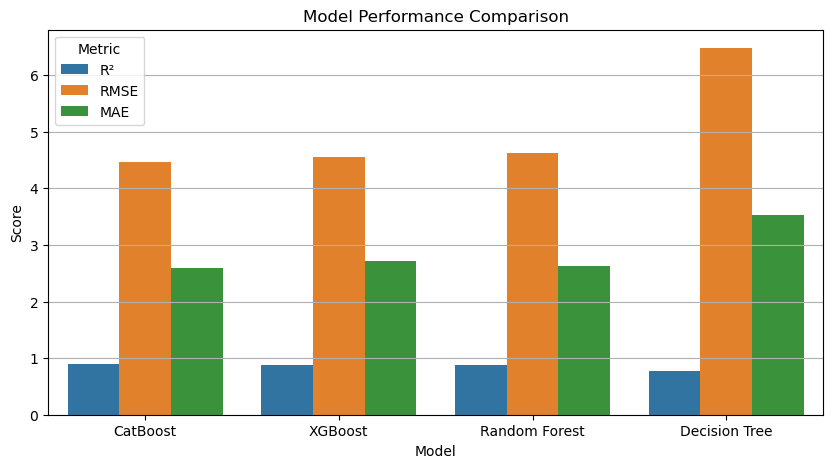

In [27]:
# Visual comparison
results_df = pd.DataFrame(metrics).T
results_df = results_df.sort_values("R²", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.grid(axis='y')
plt.show()

In [28]:
import shap

# Initialize JS visualization support
shap.initjs()

# Use a small sample for performance
X_sample = X_test.sample(1000, random_state=42)

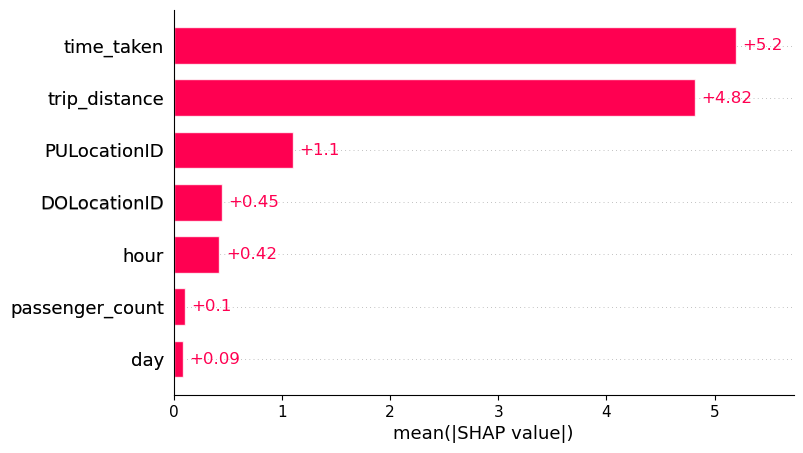

In [29]:
# SHAP values for CatBoost
explainer_cat = shap.Explainer(cat_model)
shap_values_cat = explainer_cat(X_sample)

# Summary plot (bar)
shap.plots.bar(shap_values_cat)

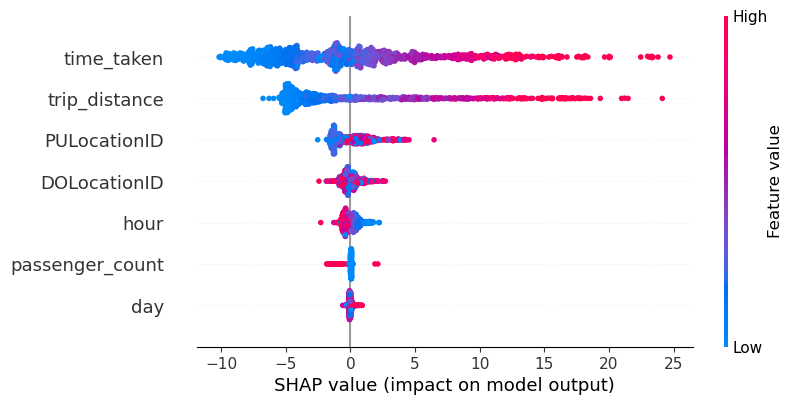

In [30]:
# Summary plot (beeswarm)
shap.plots.beeswarm(shap_values_cat)

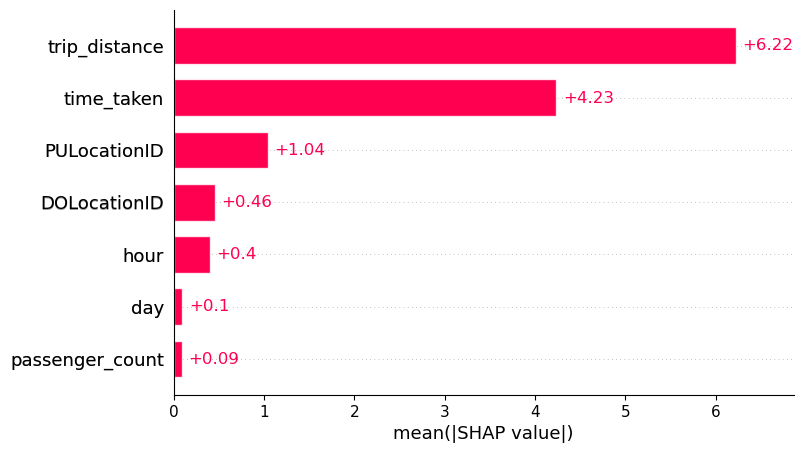

In [31]:
# SHAP values for XGBoost
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_sample)

# Summary plot (bar)
shap.plots.bar(shap_values_xgb)

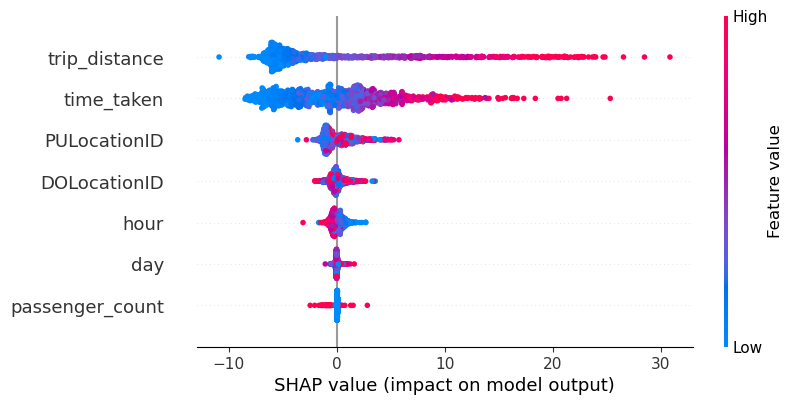

In [32]:
# Summary plot (beeswarm)
shap.plots.beeswarm(shap_values_xgb)

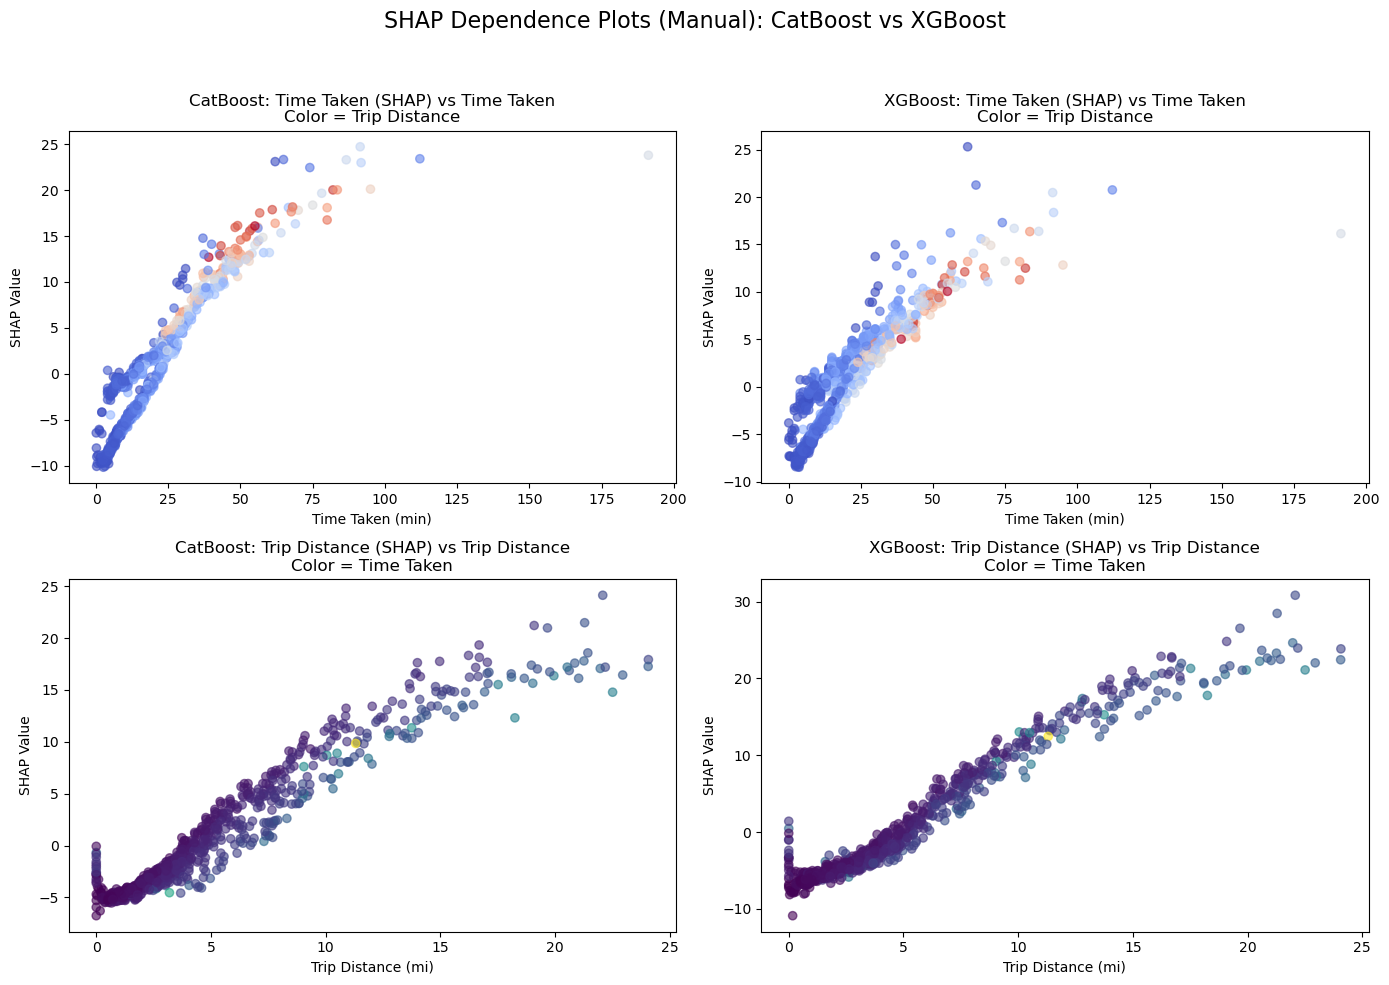

In [33]:
# Extract raw SHAP values and data
shap_vals_cat = shap_values_cat.values
shap_vals_xgb = shap_values_xgb.values
X_sample_df = X_sample.reset_index(drop=True)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("SHAP Dependence Plots (Manual): CatBoost vs XGBoost", fontsize=16)

# 1. CatBoost: time_taken SHAP vs time_taken, colored by trip_distance
axes[0, 0].scatter(
    X_sample_df["time_taken"], shap_vals_cat[:, X_sample.columns.get_loc("time_taken")],
    c=X_sample_df["trip_distance"], cmap='coolwarm', alpha=0.6
)
axes[0, 0].set_title("CatBoost: Time Taken (SHAP) vs Time Taken\nColor = Trip Distance")
axes[0, 0].set_xlabel("Time Taken (min)")
axes[0, 0].set_ylabel("SHAP Value")

# 2. XGBoost: time_taken SHAP vs time_taken, colored by trip_distance
axes[0, 1].scatter(
    X_sample_df["time_taken"], shap_vals_xgb[:, X_sample.columns.get_loc("time_taken")],
    c=X_sample_df["trip_distance"], cmap='coolwarm', alpha=0.6
)
axes[0, 1].set_title("XGBoost: Time Taken (SHAP) vs Time Taken\nColor = Trip Distance")
axes[0, 1].set_xlabel("Time Taken (min)")
axes[0, 1].set_ylabel("SHAP Value")

# 3. CatBoost: trip_distance SHAP vs trip_distance, colored by time_taken
axes[1, 0].scatter(
    X_sample_df["trip_distance"], shap_vals_cat[:, X_sample.columns.get_loc("trip_distance")],
    c=X_sample_df["time_taken"], cmap='viridis', alpha=0.6
)
axes[1, 0].set_title("CatBoost: Trip Distance (SHAP) vs Trip Distance\nColor = Time Taken")
axes[1, 0].set_xlabel("Trip Distance (mi)")
axes[1, 0].set_ylabel("SHAP Value")

# 4. XGBoost: trip_distance SHAP vs trip_distance, colored by time_taken
axes[1, 1].scatter(
    X_sample_df["trip_distance"], shap_vals_xgb[:, X_sample.columns.get_loc("trip_distance")],
    c=X_sample_df["time_taken"], cmap='viridis', alpha=0.6
)
axes[1, 1].set_title("XGBoost: Trip Distance (SHAP) vs Trip Distance\nColor = Time Taken")
axes[1, 1].set_xlabel("Trip Distance (mi)")
axes[1, 1].set_ylabel("SHAP Value")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()